# 9pm ET!
# Plan...
1. brief explore
2. minimal feat set
3. xgb!
4. metrics
5. holdout
6. iterate

iterations
- feature imp
- MOAR FEATURES
- tune params
- look at mistakes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import shap
from collections import defaultdict
sns.set_style('whitegrid')

pd.options.display.max_columns=50

/Users/scott/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/scott/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/scott/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/scott/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

# I DID NOT MECHANIC :( 

In [2]:
df_raw = pd.read_csv('data/train.csv')
print(df_raw.shape)
df_raw.head()

(3499, 26)


,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,geek_rating,num_votes,age,mechanic,owned,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,category11,category12,designer
0,17526,Hecatomb,2,4,30,30,30,2005,5.70135,360,15,Hand Management,748,Card Game,Collectible Components,Horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mike Elliott, Jonathan Tweet"
1,156,Wildlife Adventure,2,6,60,60,60,1985,5.92648,535,10,"Point to Point Movement, Route/Network Building",786,Animals,Exploration,Transportation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wolfgang Kramer, Ursula Kramer"
2,2397,Backgammon,2,2,30,30,30,-3000,6.37107,9684,8,"Betting/Wagering, Dice Rolling, Roll / Spin an...",14104,Abstract Strategy,Dice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(Uncredited)
3,8147,Maka Bana,2,6,60,45,60,2003,5.90326,658,10,"Secret Unit Deployment, Simultaneous Action Se...",897,Bluffing,Card Game,City Building,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,François Haffner
4,92190,Super Dungeon Explore,2,6,120,120,120,2011,6.37715,2338,10,"Action Point Allowance System, Dice Rolling, M...",5182,Adventure,Exploration,Fantasy,Fighting,Miniatures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chris Birkenhagen, John Cadice, Deke Stella"


In [3]:
df_ho = pd.read_csv('data/test.csv')
print(df_ho.shape)
df_ho.head()

(1500, 25)


,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,num_votes,age,mechanic,owned,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,category11,category12,designer
0,174430,Gloomhaven,1,4,120,60,120,2017,15376,12,"Action / Movement Programming, Co-operative Pl...",25928,Adventure,Exploration,Fantasy,Fighting,Miniatures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Isaac Childres
1,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,12352,14,"Action Point Allowance System, Auction/Bidding...",15848,Card Game,Civilization,Economic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vlaada Chvátil
2,12333,Twilight Struggle,2,2,180,120,180,2005,31301,13,"Area Control / Area Influence, Campaign / Batt...",42952,Modern Warfare,Political,Wargame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ananda Gupta, Jason Matthews"
3,180263,The 7th Continent,1,4,1000,5,1000,2017,6057,14,"Co-operative Play, Grid Movement, Hand Managem...",12543,Adventure,Card Game,Exploration,Horror,Science Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ludovic Roudy, Bruno Sautter"
4,84876,The Castles of Burgundy,2,4,90,30,90,2011,31613,12,"Dice Rolling, Set Collection, Tile Placement, ...",43992,Dice,Medieval,Territory Building,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stefan Feld


# 1. exploreee

In [7]:
# sweet, few nulls
df_raw.isnull().mean()

game_id        0.000000
names          0.000000
min_players    0.000000
max_players    0.000000
avg_time       0.000000
min_time       0.000000
max_time       0.000000
year           0.000000
geek_rating    0.000000
num_votes      0.000000
age            0.000000
mechanic       0.000000
owned          0.000000
category1      0.000000
category2      0.174621
category3      0.506716
category4      0.753358
category5      0.885396
category6      0.961132
category7      0.986853
category8      0.994570
category9      0.998571
category10     0.998857
category11     0.999714
category12     0.999714
designer       0.000000
dtype: float64

In [8]:
df_raw.dtypes

game_id          int64
names           object
min_players      int64
max_players      int64
avg_time         int64
min_time         int64
max_time         int64
year             int64
geek_rating    float64
num_votes        int64
age              int64
mechanic        object
owned            int64
category1       object
category2       object
category3       object
category4       object
category5       object
category6       object
category7       object
category8       object
category9       object
category10      object
category11      object
category12      object
designer        object
dtype: object

<AxesSubplot:>

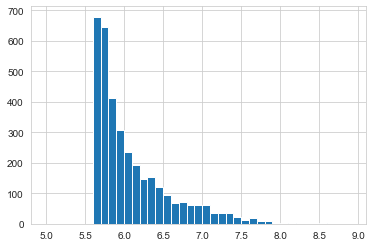

In [32]:
df_raw['geek_rating'].hist(bins=np.arange(5,9,.1))

# 2. minimal feats

In [82]:
def make_xy(df_raw):
    numer_feats = ['min_players', 'max_players', 'avg_time', 'min_time', 'max_time', 
                   'year', 'num_votes', 'age', 'owned']
    X = df_raw[numer_feats]
    
    if 'geek_rating' in df_raw.columns:
        y = df_raw['geek_rating']
        return X, y
    else:
        return X, None
    
X, y = make_xy(df_raw)
print(X.shape)
print(len(y))
X

(3499, 9)
3499


,min_players,max_players,avg_time,min_time,max_time,year,num_votes,age,owned
0,2,4,30,30,30,2005,360,15,748
1,2,6,60,60,60,1985,535,10,786
2,2,2,30,30,30,-3000,9684,8,14104
3,2,6,60,45,60,2003,658,10,897
4,2,6,120,120,120,2011,2338,10,5182
...,...,...,...,...,...,...,...,...,...
3494,2,5,30,30,30,2017,426,12,641
3495,2,5,45,30,45,2013,486,15,1255
3496,2,2,15,15,15,2003,685,8,897
3497,2,4,10,10,10,2017,206,8,234


In [83]:
df_raw.columns

Index(['game_id', 'names', 'min_players', 'max_players', 'avg_time',
       'min_time', 'max_time', 'year', 'geek_rating', 'num_votes', 'age',
       'mechanic', 'owned', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10', 'category11', 'category12', 'designer'],
      dtype='object')

# 3. xgb

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
print(X_train.shape, X_test.shape)

(2449, 9) (1050, 9)


In [85]:
# start with basic params
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0, 0.5, 'pred score')

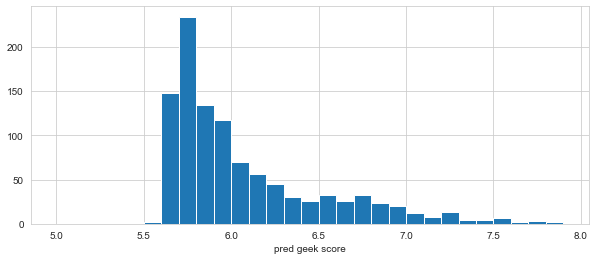

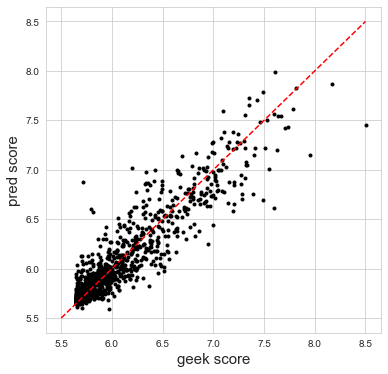

In [86]:
y_test_pred = xgb.predict(X_test)

plt.figure(figsize=(10,4))
plt.hist(y_test_pred, bins=np.arange(5,8,.1))
plt.xlabel('pred geek score')

plt.figure(figsize=(6,6))
plt.plot(y_test, y_test_pred, 'k.')
plt.plot([5.5,8.5], [5.5,8.5], 'r--')
plt.xlabel('geek score', size=15)
plt.ylabel('pred score', size=15)

### metrics

In [87]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

dict_perfs = defaultdict(list)
dict_perfs['v'].append(1)
dict_perfs['name'].append('base')
dict_perfs['r2'].append(r2)
dict_perfs['mse'].append(mse)
dict_perfs['rmse'].append(rmse)

df_perf = pd.DataFrame(dict_perfs)
df_perf

,v,name,r2,mse,rmse
0,1,base,0.846954,0.035213,0.187652


# holdout pred

In [47]:
X_ho, _ = make_xy(df_ho)
ho_indices = df_ho['game_id']
y_ho_pred = xgb.predict(X_ho)
df_save = pd.DataFrame({'game_id': ho_indices, 'geek_rating': y_ho_pred})
df_save.to_csv('preds_v1.csv', index=False)

# Feature imp

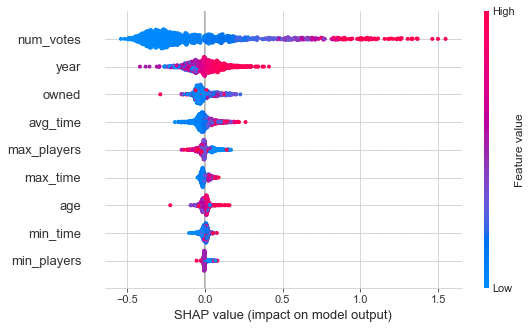

In [51]:
# more votes is more geeky; more recent year; longer games; higher age
exp = shap.TreeExplainer(xgb)
vals = exp.shap_values(X_test)
shap.summary_plot(vals, X_test)

In [52]:
df_raw.head()

,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,geek_rating,num_votes,age,mechanic,owned,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,category11,category12,designer
0,17526,Hecatomb,2,4,30,30,30,2005,5.70135,360,15,Hand Management,748,Card Game,Collectible Components,Horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mike Elliott, Jonathan Tweet"
1,156,Wildlife Adventure,2,6,60,60,60,1985,5.92648,535,10,"Point to Point Movement, Route/Network Building",786,Animals,Exploration,Transportation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wolfgang Kramer, Ursula Kramer"
2,2397,Backgammon,2,2,30,30,30,-3000,6.37107,9684,8,"Betting/Wagering, Dice Rolling, Roll / Spin an...",14104,Abstract Strategy,Dice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(Uncredited)
3,8147,Maka Bana,2,6,60,45,60,2003,5.90326,658,10,"Secret Unit Deployment, Simultaneous Action Se...",897,Bluffing,Card Game,City Building,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,François Haffner
4,92190,Super Dungeon Explore,2,6,120,120,120,2011,6.37715,2338,10,"Action Point Allowance System, Dice Rolling, M...",5182,Adventure,Exploration,Fantasy,Fighting,Miniatures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chris Birkenhagen, John Cadice, Deke Stella"


More feats: 
- is category
- number of games by that designer
- owned : votes ratio; owned per year since 2021; range of players; # categories

Next
- onehot categories - maybe do some mean score encoding
- designer stuff

### v2 - some more feats

0       3
1       3
2       2
3       3
4       5
       ..
3494    2
3495    4
3496    4
3497    1
3498    2
Length: 3499, dtype: int64

<AxesSubplot:>

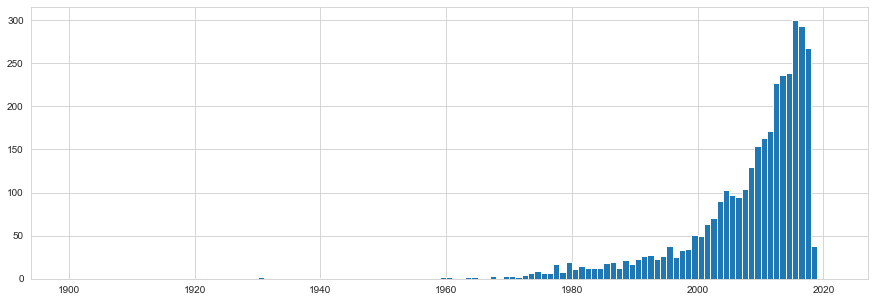

In [63]:
plt.figure(figsize=(15,5))
df_raw['year'].hist(bins=np.arange(1900,2022))

In [88]:
def make_xy(df_in):
    df = df_in.copy()
    df['year'] = df['year'].clip(1960,2019)
    df['player_range'] = df['max_players'] - df['min_players']
    df['time_range'] = df['max_time'] - df['min_time']
    df['votes_per_owned'] = df['num_votes'] / df['owned']
    df['votes_per_year_since_2019'] = df['num_votes'] / (2019 - df_raw['year'])
    df['owned_per_year_since_2019'] = df['owned'] / (2019 - df_raw['year'])
    
    cat_cols = [col for col in df.columns if 'category' in col]
    df['n_categories'] = 12 - df[cat_cols].isnull().sum(axis=1)
    
    
    numer_feats = ['min_players', 'max_players', 'avg_time', 'min_time', 'max_time', 
                   'year', 'num_votes', 'age', 'owned',
                   'player_range', 'time_range', 'votes_per_owned',
                   'votes_per_year_since_2019', 'owned_per_year_since_2019', 'n_categories'
                  ]
    X = df[numer_feats]
    
    if 'geek_rating' in df.columns:
        y = df['geek_rating']
        return X, y
    else:
        return X, None
    
X, y = make_xy(df_raw)
print(X.shape)
print(len(y))
X

(3499, 15)
3499


,min_players,max_players,avg_time,min_time,max_time,year,num_votes,age,owned,player_range,time_range,votes_per_owned,votes_per_year_since_2019,owned_per_year_since_2019,n_categories
0,2,4,30,30,30,2005,360,15,748,2,0,0.481283,25.714286,53.428571,3
1,2,6,60,60,60,1985,535,10,786,4,0,0.680662,15.735294,23.117647,3
2,2,2,30,30,30,1960,9684,8,14104,0,0,0.686614,1.929468,2.810122,2
3,2,6,60,45,60,2003,658,10,897,4,15,0.733556,41.125000,56.062500,3
4,2,6,120,120,120,2011,2338,10,5182,4,0,0.451177,292.250000,647.750000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,2,5,30,30,30,2017,426,12,641,3,0,0.664587,213.000000,320.500000,2
3495,2,5,45,30,45,2013,486,15,1255,3,15,0.387251,81.000000,209.166667,4
3496,2,2,15,15,15,2003,685,8,897,0,0,0.763657,42.812500,56.062500,4
3497,2,4,10,10,10,2017,206,8,234,2,0,0.880342,103.000000,117.000000,1


In [79]:
X['n_categories'].value_counts().sort_index()

1      611
2     1162
3      863
4      462
5      265
6       90
7       27
8       14
9        1
10       3
12       1
Name: n_categories, dtype: int64

(2449, 15) (1050, 15)


Text(0.5, 1.0, 'Real vs pred')

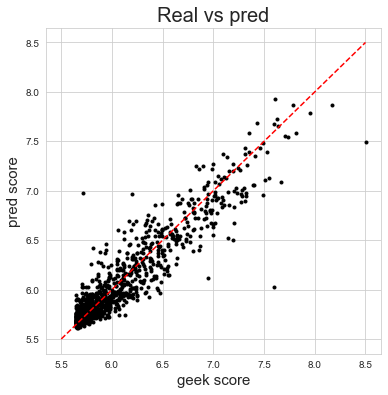

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
print(X_train.shape, X_test.shape)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_test_pred = xgb.predict(X_test)

plt.figure(figsize=(6,6))
plt.plot(y_test, y_test_pred, 'k.')
plt.plot([5.5,8.5], [5.5,8.5], 'r--')
plt.xlabel('geek score', size=15)
plt.ylabel('pred score', size=15)
plt.title('Real vs pred', size=20)

In [90]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

# dict_perfs = defaultdict(list)
dict_perfs['v'].append(2)
dict_perfs['name'].append('some feats')
dict_perfs['r2'].append(r2)
dict_perfs['mse'].append(mse)
dict_perfs['rmse'].append(rmse)

df_perf = pd.DataFrame(dict_perfs)
df_perf

,v,name,r2,mse,rmse
0,1,base,0.846954,0.035213,0.187652
1,2,some feats,0.864547,0.031166,0.176538


# 3. MORE FEATS

In [91]:
df_train, _, _, _ = train_test_split(df_raw, y, test_size=.3, random_state=0)
df_train


,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,geek_rating,num_votes,age,mechanic,owned,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,category11,category12,designer
849,19857,Glory to Rome,2,5,60,60,60,2005,7.31152,11555,12,"Card Drafting, Hand Management, Set Collection...",12799,Ancient,Card Game,City Building,Economic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ed Carter, Carl Chudyk"
820,174182,Force of Will,2,2,30,30,0,2014,5.68564,174,13,"Deck / Pool Building, Hand Management",334,Card Game,Collectible Components,Fantasy,Fighting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
886,56796,Let's Catch the Lion!,2,2,15,15,15,2008,5.82999,448,4,Grid Movement,608,Abstract Strategy,Animals,Children's Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Madoka Kitao
1288,25738,The Big Taboo,4,0,0,0,0,2006,5.73308,460,12,"Acting, Memory, Paper-and-Pencil, Partnerships",902,Action / Dexterity,Memory,Party Game,Word Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brian Hersch
414,193668,The Red Dragon Inn: Battle for Greyport,2,5,100,40,100,2016,5.82470,316,12,"Co-operative Play, Deck / Pool Building, Dice ...",890,Card Game,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nate Heiss, Jeff Morrow, Sam Waller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,55952,Greed Incorporated,3,5,180,180,180,2009,6.15323,821,14,"Auction/Bidding, Trading",928,Economic,Industry / Manufacturing,Negotiation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jeroen Doumen, Joris Wiersinga"
3264,41762,Fastrack,2,2,10,10,10,2008,5.76981,430,5,none,817,Action / Dexterity,Children's Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jean-Marie Albert
1653,214293,Mountains of Madness,3,5,90,60,90,2017,5.93394,828,12,"Co-operative Play, Dice Rolling, Grid Movement...",1791,Horror,Novel-based,Real-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rob Daviau
2607,172287,Champions of Midgard,2,4,90,60,90,2015,7.40129,6364,10,"Dice Rolling, Set Collection, Variable Player ...",9778,Adventure,Dice,Fantasy,Fighting,Medieval,Mythology,NaN,NaN,NaN,NaN,NaN,NaN,Ole Steiness


In [117]:
cat

689

In [118]:
cat_counts

Card Game              689
 Wargame               477
 Fantasy               425
 Fighting              330
 Science Fiction       284
                      ... 
 American Civil War      1
 Aviation / Flight       1
Game System              1
Number                   1
 Age of Reason           1
Length: 160, dtype: int64

In [119]:
pd.options.display.max_rows=50


,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,geek_rating,num_votes,age,mechanic,owned,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,category11,category12,designer,cat_is_Card Game,cat_is_ Wargame,cat_is_ Fantasy
1069,109779,Garden Dice,2,4,60,60,60,2012,6.10682,1118,13,"Dice Rolling, Set Collection, Tile Placement",1742,Dice,Farming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doug Bass,0,0,0
3497,230852,BONK,2,4,10,10,10,2017,5.66587,206,8,none,234,Action / Dexterity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David Harvey,0,0,0
2943,193558,The Oracle of Delphi,2,4,100,70,100,2016,6.82629,2687,12,"Action Point Allowance System, Dice Rolling, G...",4116,Ancient,Mythology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stefan Feld,0,0,0
3493,203417,Exit: The Game – The Secret Lab,1,6,150,45,150,2016,6.77218,2562,12,Co-operative Play,5530,Deduction,Puzzle,Real-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Inka Brand, Markus Brand",0,0,0
1541,159141,Code of Nine,3,4,40,40,40,2012,5.71958,329,13,Worker Placement,713,Bluffing,Deduction,Science Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BakaFire,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1563,Rise and Decline of the Third Reich,2,6,1440,1440,1440,1974,6.22131,1645,14,"Dice Rolling, Hex-and-Counter, Simulation",3962,Negotiation,Political,Wargame,World War II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Don Greenwood, John Prados",0,1,0
1948,3685,Hammer of the Scots,2,2,180,120,180,2002,7.04238,3509,12,"Area Movement, Campaign / Battle Card Driven, ...",4466,Medieval,Wargame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Tom Dalgliesh, Jerry Taylor",0,1,0
582,160436,Lost Legacy: Binbo Tantei to Inbo no Shiro,2,8,10,10,10,2014,5.64419,101,10,"Hand Management, Memory, Player Elimination",306,Bluffing,Card Game,Deduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hisashi Hayashi, Seiji Kanai, Hayato Kisaragi",1,0,0
3199,223750,Hardback,1,5,90,45,90,2018,6.32347,754,10,"Deck / Pool Building, Press Your Luck",3001,Card Game,Word Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jeff Beck (II), Tim Fowers",1,0,0


In [226]:
# Make designer avg score
designer_count = df_train.groupby('designer')['geek_rating'].count()
designer_mean_votes = df_train.groupby('designer')['num_votes'].mean()
df_raw['designer'].map(designer_mean_ratings).fillna(-1)

0       5.701350
1      -1.000000
2       6.051614
3       5.903260
4      -1.000000
          ...   
3494    6.554040
3495    5.916407
3496    5.722510
3497    5.665870
3498    6.191133
Name: designer, Length: 3499, dtype: float64

In [239]:
# get categories to keep
cat_cols_og = [col for col in df_raw.columns if 'category' in col]
cat_counts = pd.Series(df_raw[cat_cols_og].to_numpy().flatten()).value_counts()
categories_keep = cat_counts[cat_counts>100].index

def make_xy(df_in):
    df = df_in.copy()
    df['year'] = df['year'].clip(1960,2019)
    df['player_range'] = df['max_players'] - df['min_players']
    df['time_range'] = df['max_time'] - df['min_time']
    df['votes_per_owned'] = df['num_votes'] / df['owned']
    df['votes_per_year_since_2019'] = df['num_votes'] / (2019 - df_raw['year'])
    df['owned_per_year_since_2019'] = df['owned'] / (2019 - df_raw['year'])
    df['desinger_mv'] = df['designer'].map(designer_mean_votes).fillna(-1)
    df['desinger_count_games'] = df['designer'].map(designer_count).fillna(-1)
    
    cat_cols = [col for col in df.columns if 'category' in col]
    df['n_categories'] = 12 - df[cat_cols].isnull().sum(axis=1)
    
    # Get category
    for cat in categories_keep:
        df[f'cat_is_{cat}'] = df[cat_cols].apply(lambda r: r.str.contains(cat, case=False).any(), axis=1).astype(int)
    catis_cols = [col for col in df if 'cat_is_' in col]
    
    numer_feats = ['min_players', 'max_players', 'avg_time', 'min_time', 'max_time', 
                   'year', 'num_votes', 'age', 'owned',
                   'player_range', 'time_range', 'votes_per_owned',
                   'votes_per_year_since_2019', 'owned_per_year_since_2019', 'n_categories', 
                   'desinger_mv', 'desinger_count_games'
                  ] + catis_cols
    X = df[numer_feats]
    
    if 'geek_rating' in df.columns:
        y = df['geek_rating']
        return X, y
    else:
        return X, None
    
X, y = make_xy(df_raw)
print(X.shape)
print(len(y))
X

(3499, 50)
3499


,min_players,max_players,avg_time,min_time,max_time,year,num_votes,age,owned,player_range,time_range,votes_per_owned,votes_per_year_since_2019,owned_per_year_since_2019,n_categories,desinger_mv,desinger_count_games,cat_is_Card Game,cat_is_ Wargame,cat_is_ Fantasy,cat_is_ Fighting,cat_is_ Science Fiction,cat_is_ Card Game,cat_is_Economic,cat_is_ World War II,cat_is_Adventure,cat_is_ Miniatures,cat_is_Abstract Strategy,cat_is_Bluffing,cat_is_ Medieval,cat_is_ Party Game,cat_is_ Economic,cat_is_ Exploration,cat_is_Wargame,cat_is_Ancient,cat_is_ Dice,cat_is_ Deduction,cat_is_Animals,cat_is_Action / Dexterity,cat_is_ Territory Building,cat_is_ Humor,cat_is_Dice,cat_is_ Negotiation,cat_is_Fantasy,cat_is_ Transportation,cat_is_ Real-time,cat_is_ Political,cat_is_ Nautical,cat_is_ Horror,cat_is_City Building
0,2,4,30,30,30,2005,360,15,748,2,0,0.481283,25.714286,53.428571,3,360.000000,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,6,60,60,60,1985,535,10,786,4,0,0.680662,15.735294,23.117647,3,-1.000000,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,2,2,30,30,30,1960,9684,8,14104,0,0,0.686614,1.929468,2.810122,2,1926.135135,37.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2,6,60,45,60,2003,658,10,897,4,15,0.733556,41.125000,56.062500,3,658.000000,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,6,120,120,120,2011,2338,10,5182,4,0,0.451177,292.250000,647.750000,5,-1.000000,-1.0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,2,5,30,30,30,2017,426,12,641,3,0,0.664587,213.000000,320.500000,2,7903.000000,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3495,2,5,45,30,45,2013,486,15,1255,3,15,0.387251,81.000000,209.166667,4,472.000000,4.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3496,2,2,15,15,15,2003,685,8,897,0,0,0.763657,42.812500,56.062500,4,685.000000,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3497,2,4,10,10,10,2017,206,8,234,2,0,0.880342,103.000000,117.000000,1,206.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


(2449, 50) (1050, 50)


Text(0.5, 1.0, 'Real vs pred')

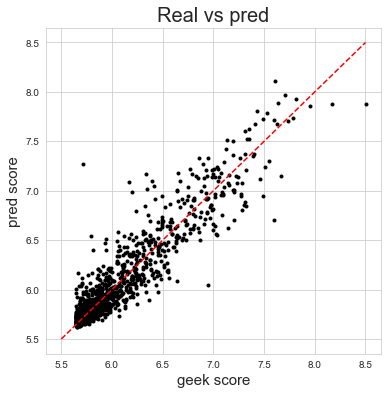

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
print(X_train.shape, X_test.shape)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_test_pred = xgb.predict(X_test)

plt.figure(figsize=(6,6))
plt.plot(y_test, y_test_pred, 'k.')
plt.plot([5.5,8.5], [5.5,8.5], 'r--')
plt.xlabel('geek score', size=15)
plt.ylabel('pred score', size=15)
plt.title('Real vs pred', size=20)

In [241]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

# dict_perfs = defaultdict(list)
dict_perfs['v'].append(13)
dict_perfs['name'].append('designer feats v2 fo real')
dict_perfs['r2'].append(r2)
dict_perfs['mse'].append(mse)
dict_perfs['rmse'].append(rmse)

df_perf = pd.DataFrame(dict_perfs)
df_perf

,v,name,r2,mse,rmse
0,1,base,0.846954,0.035213,0.187652
1,2,some feats,0.864547,0.031166,0.176538
2,3,category feats,0.502919,0.114370,0.338186
3,4,cv v1,0.559466,0.101360,0.318370
4,5,cv v2,0.599201,0.092217,0.303673
5,6,cv v3,0.582640,0.096028,0.309883
6,7,cv v4,0.649897,0.080553,0.283818
7,8,rmv designer,0.855812,0.033175,0.182141
8,9,cv no design,0.869915,0.029930,0.173004
9,10,more categories,0.856124,0.033103,0.181944


In [170]:
# wtf, that did a lot worse. overfit?
# oh, yeah, overfitting like hell
y_train_pred = xgb.predict(X_train)
mean_squared_error(y_train, y_train_pred)

0.0012983856713117648

# crossval

In [127]:
from sklearn.model_selection import RandomizedSearchCV

In [171]:
param_distributions = {
    'n_estimators': [100],
    'eta': [.03, .1, .3],
    'max_depth': [3],
    'subsample': [.5, .8, 1],
    'alpha': [.1, .3, 1],
}
xgb = XGBRegressor()
xgbcv = RandomizedSearchCV(xgb, param_distributions=param_distributions)
xgbcv.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
     

In [172]:
xgbcv.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'max_depth': 3,
 'eta': 0.1,
 'alpha': 0.3}

In [173]:
pd.DataFrame(xgbcv.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_eta,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.214511,0.064245,0.006166,0.001200,0.5,100,3,0.1,0.3,"{'subsample': 0.5, 'n_estimators': 100, 'max_d...",0.885025,0.891098,0.874293,0.892264,0.863171,0.881171,0.011025,1
5,0.183931,0.008992,0.006160,0.001084,0.8,100,3,0.1,0.1,"{'subsample': 0.8, 'n_estimators': 100, 'max_d...",0.883761,0.884533,0.874007,0.894528,0.866883,0.880742,0.009497,2
7,0.199909,0.065204,0.006620,0.003079,1,100,3,0.1,0.3,"{'subsample': 1, 'n_estimators': 100, 'max_dep...",0.882074,0.889815,0.869359,0.896228,0.863317,0.880159,0.012292,3
8,0.211471,0.058996,0.005483,0.000088,0.5,100,3,0.1,1,"{'subsample': 0.5, 'n_estimators': 100, 'max_d...",0.877534,0.886589,0.873653,0.893589,0.864448,0.879163,0.010127,4
6,0.200988,0.048461,0.005575,0.000723,1,100,3,0.1,1,"{'subsample': 1, 'n_estimators': 100, 'max_dep...",0.886035,0.882603,0.872966,0.890915,0.860398,0.878584,0.010826,5
2,0.212161,0.035413,0.007830,0.004090,0.8,100,3,0.3,0.1,"{'subsample': 0.8, 'n_estimators': 100, 'max_d...",0.883550,0.874445,0.860729,0.888144,0.866487,0.874671,0.010215,6
9,0.211672,0.061737,0.005734,0.000251,0.5,100,3,0.3,0.3,"{'subsample': 0.5, 'n_estimators': 100, 'max_d...",0.879417,0.879548,0.869705,0.880917,0.860931,0.874104,0.007709,7
3,0.190528,0.011542,0.005931,0.000698,1,100,3,0.3,0.1,"{'subsample': 1, 'n_estimators': 100, 'max_dep...",0.874097,0.883137,0.851286,0.888859,0.855231,0.870522,0.014913,8
0,0.206233,0.057470,0.005737,0.000767,0.5,100,3,0.3,0.1,"{'subsample': 0.5, 'n_estimators': 100, 'max_d...",0.869045,0.877524,0.849220,0.873610,0.847053,0.863290,0.012679,9
1,0.170202,0.008517,0.006051,0.000988,0.5,100,3,0.03,0.3,"{'subsample': 0.5, 'n_estimators': 100, 'max_d...",0.470698,0.556102,0.559057,0.551635,0.435522,0.514603,0.051481,10


Text(0.5, 1.0, 'Real vs pred')

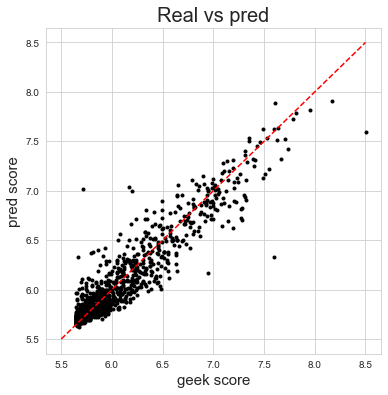

In [174]:
y_test_pred = xgbcv.predict(X_test)

plt.figure(figsize=(6,6))
plt.plot(y_test, y_test_pred, 'k.')
plt.plot([5.5,8.5], [5.5,8.5], 'r--')
plt.xlabel('geek score', size=15)
plt.ylabel('pred score', size=15)
plt.title('Real vs pred', size=20)

In [224]:
y_test_pred.min()

5.6230974

In [225]:
y_test_pred.max()

7.9072814

In [175]:
y_train_pred = xgbcv.predict(X_train)
mean_squared_error(y_train, y_train_pred)

0.01929316682016662

In [176]:
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

# dict_perfs = defaultdict(list)
dict_perfs['v'].append(11)
dict_perfs['name'].append('cv more categories')
dict_perfs['r2'].append(r2)
dict_perfs['mse'].append(mse)
dict_perfs['rmse'].append(rmse)

df_perf = pd.DataFrame(dict_perfs)
df_perf

,v,name,r2,mse,rmse
0,1,base,0.846954,0.035213,0.187652
1,2,some feats,0.864547,0.031166,0.176538
2,3,category feats,0.502919,0.114370,0.338186
3,4,cv v1,0.559466,0.101360,0.318370
4,5,cv v2,0.599201,0.092217,0.303673
5,6,cv v3,0.582640,0.096028,0.309883
6,7,cv v4,0.649897,0.080553,0.283818
7,8,rmv designer,0.855812,0.033175,0.182141
8,9,cv no design,0.869915,0.029930,0.173004
9,10,more categories,0.856124,0.033103,0.181944


Text(0.5, 1.0, 'Progress! interrupted.')

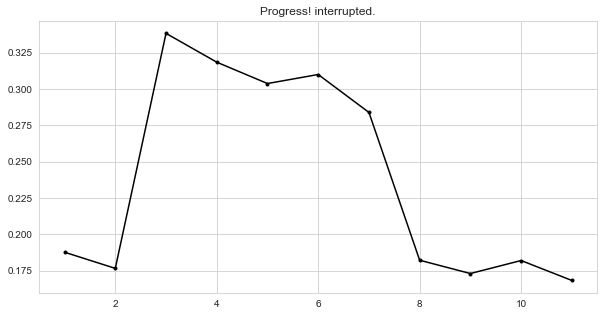

In [177]:
plt.figure(figsize=(10,5))
plt.plot(df_perf['v'], df_perf['rmse'], 'k.-')
plt.title('Progress! interrupted.')

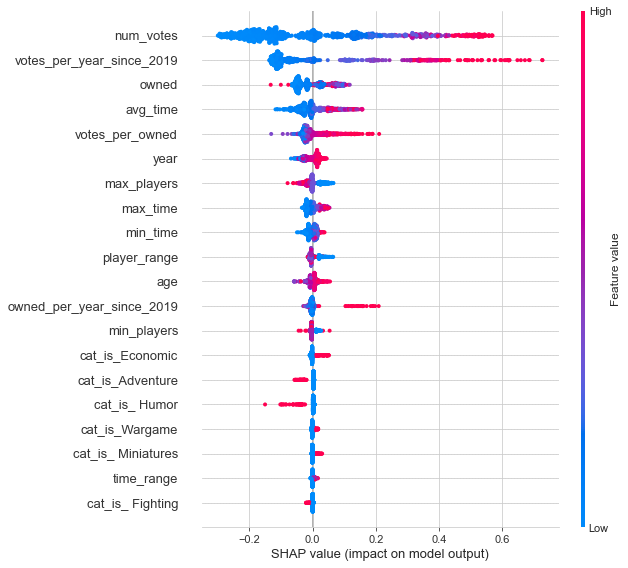

In [178]:
# Economic games :D; not humor. lol
exp = shap.TreeExplainer(xgbcv.best_estimator_)
vals = exp.shap_values(X_test)
shap.summary_plot(vals, X_test)

# time for another submission

In [31]:
df_ho

,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,num_votes,age,mechanic,owned,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,category11,category12,designer
0,174430,Gloomhaven,1,4,120,60,120,2017,15376,12,"Action / Movement Programming, Co-operative Pl...",25928,Adventure,Exploration,Fantasy,Fighting,Miniatures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Isaac Childres
1,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,12352,14,"Action Point Allowance System, Auction/Bidding...",15848,Card Game,Civilization,Economic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vlaada Chvátil
2,12333,Twilight Struggle,2,2,180,120,180,2005,31301,13,"Area Control / Area Influence, Campaign / Batt...",42952,Modern Warfare,Political,Wargame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ananda Gupta, Jason Matthews"
3,180263,The 7th Continent,1,4,1000,5,1000,2017,6057,14,"Co-operative Play, Grid Movement, Hand Managem...",12543,Adventure,Card Game,Exploration,Horror,Science Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ludovic Roudy, Bruno Sautter"
4,84876,The Castles of Burgundy,2,4,90,30,90,2011,31613,12,"Dice Rolling, Set Collection, Tile Placement, ...",43992,Dice,Medieval,Territory Building,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stefan Feld
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,207898,Captive,1,1,0,0,0,2016,84,10,none,223,Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emmanuel Manuro
1496,55911,Albion,2,4,60,60,60,2009,346,10,"Area Control / Area Influence, Worker Placement",630,Ancient,Territory Building,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Klaus-Jürgen Wrede
1497,6569,Cronberg,2,4,20,20,20,2003,456,8,"Area Enclosure, Tile Placement",561,City Building,Print & Play,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Tobias Goslar, Roland Goslar"
1498,42713,Arcane Legions,2,6,120,60,120,2009,277,10,"Action Point Allowance System, Dice Rolling, V...",825,Ancient,Collectible Components,Dice,Fantasy,Miniatures,Mythology,Wargame,NaN,NaN,NaN,NaN,NaN,"Tyler Bielman, Jonathon Loucks, Ethan Pasterna..."


In [179]:
X_ho, _ = make_xy(df_ho)
ho_indices = df_ho['game_id']
y_ho_pred = xgbcv.predict(X_ho)
df_save = pd.DataFrame({'game_id': ho_indices, 'geek_rating': y_ho_pred})
df_save.to_csv('preds_v2.csv', index=False)

# YO JIN!

# CASH APP GIVEAWAY

# First person to request money from me (cashtag: scottrcole); I'll send them some caaaaaaash

# some of yall greedy

# im gonna get risk blocked by my own models >.>

# ok, that's all. i think that was 5 people

more stuff
- corr matrix
- look at geek score as fn of category and designer

<AxesSubplot:>

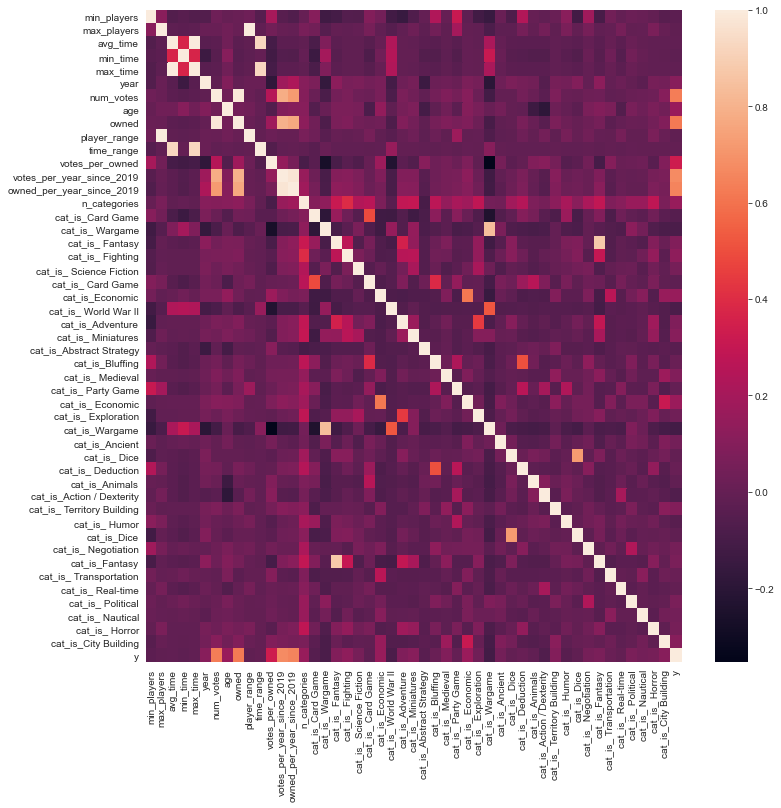

In [186]:
# fantasy is dupped and dice. wtf wargame
df_corr = X_train.copy()
df_corr['y'] = y_train

plt.figure(figsize=(12,12))
sns.heatmap(df_corr.corr())

In [190]:
df_corr[df_corr['cat_is_Card Game']==1]['y'].values

array([7.31152, 5.68564, 5.8247 , 5.77385, 5.74416, 6.63294, 5.79568,
       6.21146, 5.68019, 6.06143, 5.67334, 5.64129, 5.74395, 6.08284,
       5.79893, 5.72987, 5.74424, 5.91058, 6.24735, 5.75691, 6.562  ,
       6.55458, 6.1212 , 6.37815, 5.67909, 5.77957, 5.7045 , 6.7912 ,
       5.91499, 5.8297 , 5.70155, 6.16167, 6.19012, 6.03635, 5.71265,
       5.73402, 6.12282, 6.51138, 6.13772, 5.64085, 6.03206, 5.88588,
       5.73026, 5.86632, 5.80531, 5.70209, 5.71019, 5.92357, 6.25622,
       5.77778, 5.66223, 6.081  , 5.79029, 6.48972, 6.11428, 5.81453,
       6.30069, 5.66116, 5.97537, 6.21052, 5.81357, 5.76468, 6.95648,
       5.89356, 5.86077, 5.97615, 5.76635, 6.46935, 5.8725 , 6.23473,
       7.04925, 6.48711, 6.46576, 5.76567, 5.84239, 5.64492, 5.9047 ,
       5.84337, 5.67768, 5.78738, 5.88366, 5.84254, 5.80372, 6.83043,
       7.69843, 5.76655, 5.66578, 6.07096, 6.18579, 6.76813, 6.53117,
       5.68914, 6.51709, 6.55404, 6.88043, 5.81001, 6.53024, 5.65258,
       5.89056, 5.79

In [193]:
cat

'cat_is_City Building'

In [195]:
dfs_plt

[]

In [205]:
# cols: category; geek score --> SWARM
cat_cols = [col for col in df_corr.columns if 'cat_is' in col]
dfs_plt = []
for cat in cat_cols:
    cat_scores = df_corr[df_corr[cat]==1]['y'].values
    df_tmp = pd.DataFrame({'geek_score':cat_scores})
    df_tmp['category'] = cat[7:]
    dfs_plt.append(df_tmp)
df_plt = pd.concat(dfs_plt)
print(df_plt.shape)
df_plt.head()

(5818, 2)


,geek_score,category
0,7.31152,Card Game
1,5.68564,Card Game
2,5.82470,Card Game
3,5.77385,Card Game
4,5.74416,Card Game


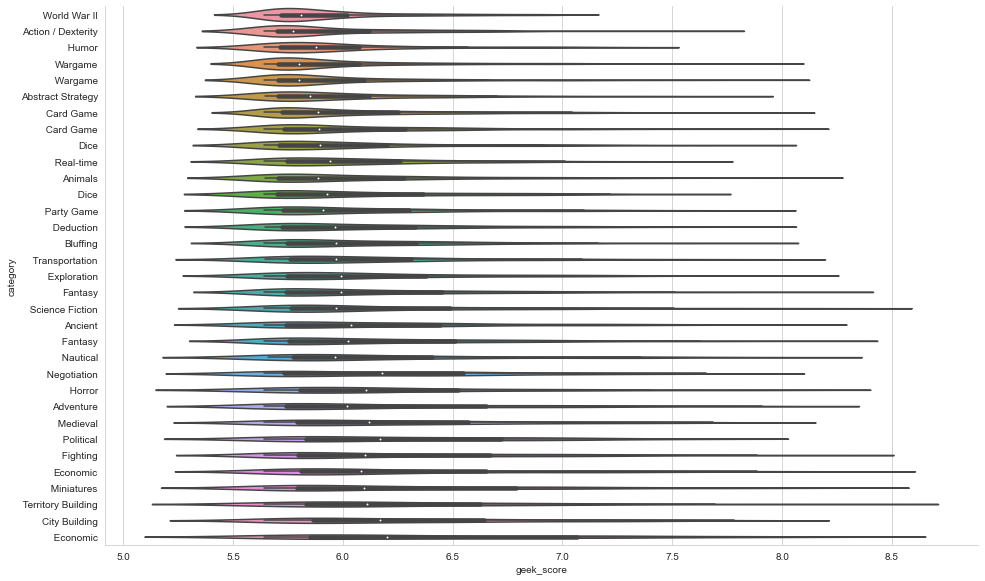

In [214]:
sns.catplot(data=df_plt, x='geek_score', y='category', kind='violin', height=8, aspect=1.7,
            order=df_plt.groupby('category')['geek_score'].mean().sort_values().index)

In [217]:
des_co = df_raw['designer'].value_counts()
des_keep = des_co[des_co > 10].index
des_keep

Index(['Reiner Knizia', '(Uncredited)', 'Martin Wallace', 'Friedemann Friese',
       'none', 'Klaus Teuber', 'Michael Schacht', 'Uwe Rosenberg',
       'Inka Brand, Markus Brand', 'Rüdiger Dorn', 'Corné van Moorsel',
       'Stefan Feld', 'Michael Kiesling, Wolfgang Kramer', 'Dirk Henn',
       'Alan R. Moon', 'Stefan Dorra', 'Leo Colovini', 'D. Brad Talton, Jr.',
       'Dean Essig', 'Richard H. Berg', 'Klaus-Jürgen Wrede', 'Vlaada Chvátil',
       'Steve Jackson (I)', 'Mike Elliott, Eric M. Lang',
       'Alan R. Moon, Aaron Weissblum', 'Thomas Lehmann', 'Ted Raicer',
       'Ignacy Trzewiczek', 'Dan Verssen', 'Richard Garfield', 'Richard Borg',
       'Frédéric Henry', 'Joseph M. Balkoski'],
      dtype='object')

# Stefan Feld is my fav <3

# TRAJAN

In [220]:
df_plt = df_raw[df_raw['designer'].isin(des_keep)][['designer', 'geek_rating']]
df_plt

,designer,geek_rating
2,(Uncredited),6.37107
7,Joseph M. Balkoski,5.85188
9,Leo Colovini,6.19622
19,Friedemann Friese,7.30793
21,Richard H. Berg,5.66576
...,...,...
3470,Martin Wallace,6.63540
3479,Leo Colovini,5.90571
3483,Vlaada Chvátil,5.93252
3486,Leo Colovini,5.91053


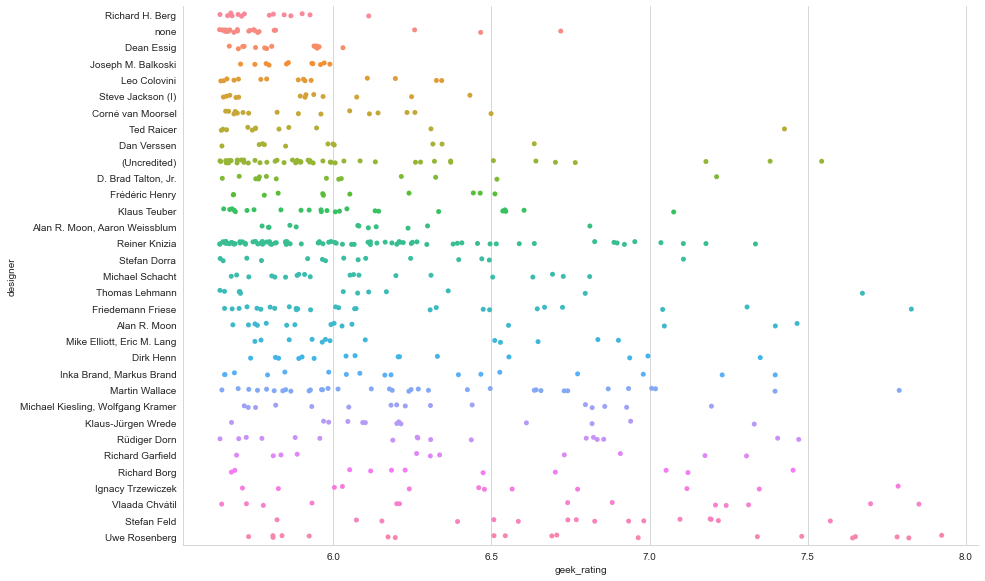

In [222]:
sns.catplot(data=df_plt, x='geek_rating', y='designer', kind='strip', height=8, aspect=1.7,
            order=df_plt.groupby('designer')['geek_rating'].mean().sort_values().index)

In [18]:
df_plt = df_raw.sample(1000)
df_plt['players_str'] = [f'{p}_' for p in df_plt['min_players']]
df_plt['time_str'] = [f'{p}_' for p in df_plt['avg_time']]
df_plt = df_plt[df_plt['avg_time'].isin([30,45,60,90,120])]
df_plt = df_plt[df_plt['min_players'].isin([1,2,3,4])]

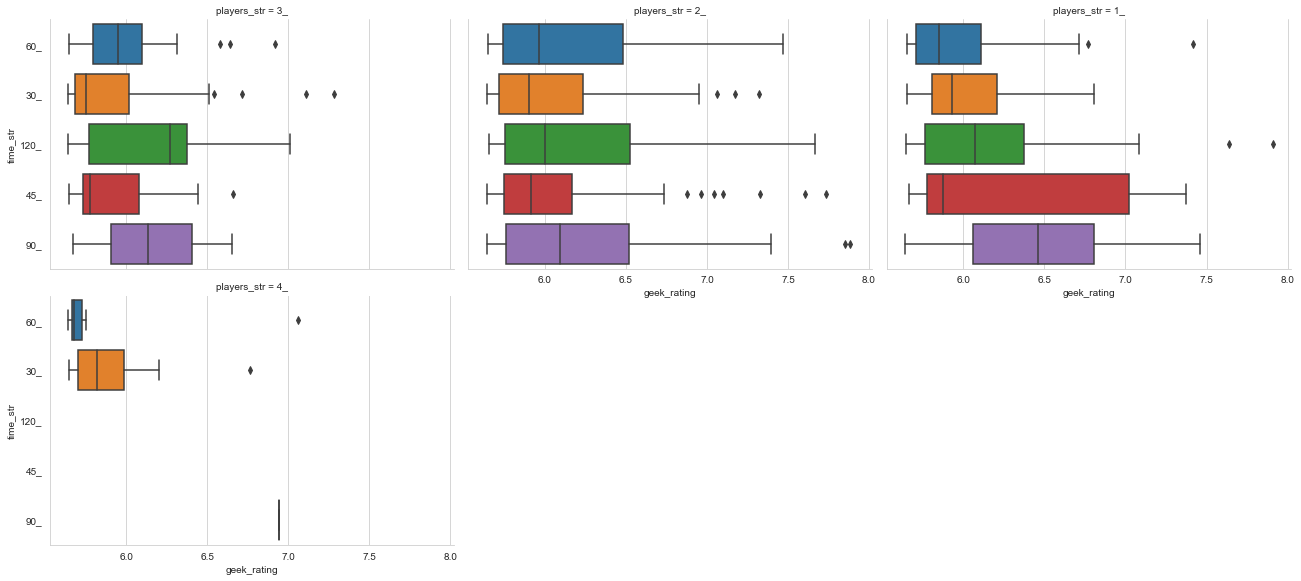

In [20]:
sns.catplot(data=df_plt, 
            x='geek_rating', y='time_str', col='players_str', kind='box', 
            height=4, aspect=1.5, col_wrap=3)

In [ ]:
# Avg score by players and duration?
df_raw.groupby(['min_players', 'avg_time'])['']

In [242]:
df_raw

,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,geek_rating,num_votes,age,mechanic,owned,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,category11,category12,designer
0,17526,Hecatomb,2,4,30,30,30,2005,5.70135,360,15,Hand Management,748,Card Game,Collectible Components,Horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mike Elliott, Jonathan Tweet"
1,156,Wildlife Adventure,2,6,60,60,60,1985,5.92648,535,10,"Point to Point Movement, Route/Network Building",786,Animals,Exploration,Transportation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wolfgang Kramer, Ursula Kramer"
2,2397,Backgammon,2,2,30,30,30,-3000,6.37107,9684,8,"Betting/Wagering, Dice Rolling, Roll / Spin an...",14104,Abstract Strategy,Dice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(Uncredited)
3,8147,Maka Bana,2,6,60,45,60,2003,5.90326,658,10,"Secret Unit Deployment, Simultaneous Action Se...",897,Bluffing,Card Game,City Building,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,François Haffner
4,92190,Super Dungeon Explore,2,6,120,120,120,2011,6.37715,2338,10,"Action Point Allowance System, Dice Rolling, M...",5182,Adventure,Exploration,Fantasy,Fighting,Miniatures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chris Birkenhagen, John Cadice, Deke Stella"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,217861,Paper Tales,2,5,30,30,30,2017,5.96386,426,12,"Card Drafting, Hand Management",641,Card Game,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masato Uesugi
3495,142555,The Lord of the Rings: The Two Towers Deck-Bui...,2,5,45,30,45,2013,5.89570,486,15,Deck / Pool Building,1255,Card Game,Fantasy,Movies / TV / Radio theme,Novel-based,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matt Hyra
3496,15474,Zombiaki,2,2,15,15,15,2003,5.72251,685,8,"Card Drafting, Hand Management",897,Card Game,Fighting,Humor,Zombies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Adam Mnich, Ignacy Trzewiczek"
3497,230852,BONK,2,4,10,10,10,2017,5.66587,206,8,none,234,Action / Dexterity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David Harvey


# avg by year

In [25]:
df_plt = df_raw.groupby('year')['geek_rating'].mean().reset_index()
df_plt = df_plt[df_plt['year'] > 1960]
df_plt

,year,geek_rating
37,1962,5.752330
38,1963,5.800500
39,1964,5.807490
40,1965,5.942490
41,1967,5.889143
42,1969,5.820660
43,1970,5.708947
44,1971,6.293925
45,1972,5.773252
46,1973,5.827816


In [28]:
df_plt2= df_raw.groupby('year')['geek_rating'].median().reset_index()
df_plt2 = df_plt2[df_plt2['year'] > 1960]
df_plt2

,year,geek_rating
37,1962,5.752330
38,1963,5.800500
39,1964,5.807490
40,1965,5.942490
41,1967,5.866320
42,1969,5.854100
43,1970,5.661190
44,1971,6.293925
45,1972,5.706015
46,1973,5.747170


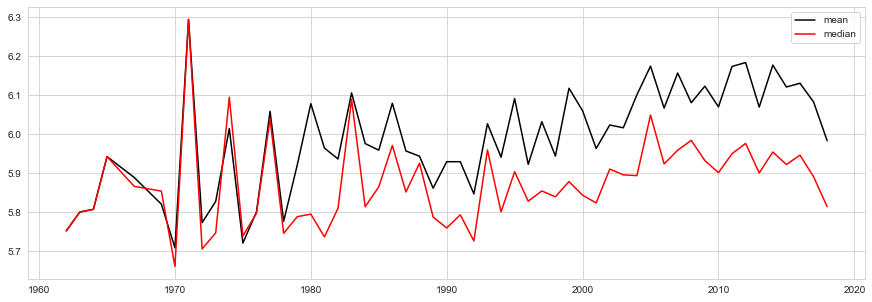

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df_plt['year'], df_plt['geek_rating'], 'k', label='mean')
plt.plot(df_plt2['year'], df_plt2['geek_rating'], 'r', label='median')
plt.legend()